In [1]:

from PyFoam.Execution.ConvergenceRunner import ConvergenceRunner
from PyFoam.Execution.UtilityRunner import UtilityRunner
from PyFoam.LogAnalysis.BoundingLogAnalyzer import BoundingLogAnalyzer
from PyFoam.RunDictionary.SolutionFile import SolutionFile
from PyFoam.RunDictionary.SolutionDirectory import SolutionDirectory

import pyvista as vtki
import numpy as np
import os
import glob


#model_name

solver="icoFoam"
case="cavity"
#pCmd="calcPressureDiff*erence"
#mCmd="calcMassFlow"

Home_Folder='/home/frederik/flunnpy'
%cd $Home_Folder
model_name_STL=glob.glob('*.stl')[0]
model_name=os.path.splitext(model_name_STL)[0]

STL_Folder=os.path.join(Home_Folder, case,'constant/triSurface')
STL_File_To_Replace=os.path.join(Home_Folder, case,'constant/triSurface/model.stl')
ModelArchivFolder=os.path.join(Home_Folder,'Models')
Case_Folder=os.path.join(Home_Folder, case)
Model_Path=os.path.join(Home_Folder,model_name_STL)
SolutionPNG_Folder=os.path.join(Home_Folder,'Solutions_PNG')
%cd $Case_Folder
!./Allclean
%cp $Model_Path $STL_File_To_Replace
#%mv $Model_Path $ModelArchivFolder
!./Allrun
%cd $Home_Folder
dire=SolutionDirectory(case,archive="InletVel")
dire.clearResults()
#dire.addBackup("PyFoamSolve.logfile")
#dire.addBackup("PyFoamSolve.analyzed")
#dire.addBackup("Pressure.analyzed")
#dire.addBackup("MassFlow.analyzed")
dire.addBackup("constant")
dire.addBackup("system")
    
sol=SolutionFile(dire.initialDir(),"U")

/home/frederik/flunnpy
/home/frederik/flunnpy/cavity
Cleaning /home/frederik/flunnpy/cavity case
Running surfaceFeatures on /home/frederik/flunnpy/cavity
Running blockMesh on /home/frederik/flunnpy/cavity
Running decomposePar on /home/frederik/flunnpy/cavity
Running snappyHexMesh on /home/frederik/flunnpy/cavity
Running patchSummary on /home/frederik/flunnpy/cavity
/home/frederik/flunnpy


Wandgeschw: 0.0
Last Time =  0.0004
/home/frederik/flunnpy/cavity/InletVel/vel=0
/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  7
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 7-ca808c8420bf
Exec   : foamToVTK
Date   : Dec 22 2019
Time   : 22:28:30
Host   : "frederik-WRT-WX9"
PID    : 12706
I/O    : uncollated
Case   : /home/frederik/flunnpy/cavity/InletVel/vel=0
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

 PyFoam WARNING on line 509 of file /home/frederik/anaconda3/lib/python3.7/site-packages/PyFoam/Execution/BasicRunner.py : Stopping run and writting 


/home/frederik/flunnpy/cavity/InletVel/vel=0/VTK


Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/frederik/anaconda3/lib/python3.7/site-packages/psutil/_common.py", line 342, in wrapper
    ret = self._cache[fun]
AttributeError: _cache

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/frederik/anaconda3/lib/python3.7/site-packages/psutil/_pslinux.py", line 1513, in wrapper
    return fun(self, *args, **kwargs)
  File "/home/frederik/anaconda3/lib/python3.7/site-packages/psutil/_common.py", line 345, in wrapper
    return fun(self)
  File "/home/frederik/anaconda3/lib/python3.7/site-packages/psutil/_pslinux.py", line 1559, in _parse_stat_file
    with open_binary("%s/%s/stat" % (self._procfs_path, self.pid)) as f:
  File "/home/frederik/anaconda3/lib/python3.7/site-packages/psutil/_common.py", line 587, in open_binary
    return open(fname, "rb", **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: '/proc/12701/stat'

During

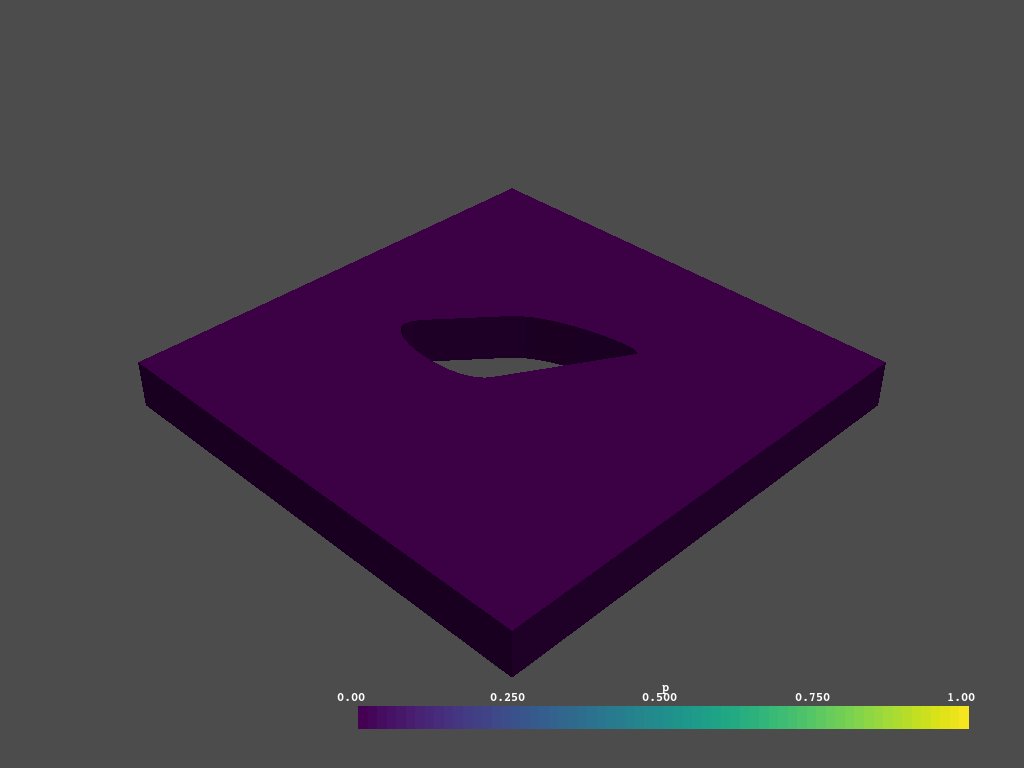

/home/frederik/flunnpy
Wandgeschw: 1.0


 PyFoam WARNING on line 509 of file /home/frederik/anaconda3/lib/python3.7/site-packages/PyFoam/Execution/BasicRunner.py : Stopping run and writting 


In [ ]:
maximum=1.
nr=5
name="InletVelResults" 
f=dire.makeFile(name)
 
for i in range(nr+1):
    # Set the boundary condition at the inlet
    val=(maximum*i)
    print("Wandgeschw:",val)
    sol.replaceBoundary("left","(%f 0 0)" %(val))

    # Run the solver
    run=ConvergenceRunner(BoundingLogAnalyzer(),argv=[solver,"-case",case],silent=True)
    run.start()
    
    print("Last Time = ",dire.getLast())

    # Get the pressure difference (Using an external utility)
    #pUtil=UtilityRunner(argv=[pCmd,"-case",case],silent=True,logname="Pressure")
    #pUtil.add("deltaP","Pressure at .* Difference .*\] (.+)")
    #pUtil.start()

    #deltaP=pUtil.get("deltaP")[0]

    # Get the mass flow
    #mUtil=UtilityRunner(argv=[mCmd,"-case",case,"-latestTime"],silent=True,logname="MassFlow")
    #mUtil.add("mass","Flux at (.+?) .*\] (.+)",idNr=1)
    #mUtil.start()

    #massFlow=mUtil.get("mass",ID="outlet")[0]

    # Archive the results
    
    dire.lastToArchive("vel=%g" % (val))
    
    CurrentPath=os.path.join('/home/frederik/flunnpy', case, 'InletVel',"vel=%g" % (val))
    SolutionName=model_name+'_'+case+'_'+"vel_%g" % (val)
    
    %cd $CurrentPath
    !foamToVTK

    VTK_File_Path=os.path.join(CurrentPath,'VTK')
    %cd $VTK_File_Path
    vtk_filename=glob.glob('*.vtk')
    vtk_filename[0]
    grid = vtki.UnstructuredGrid(vtk_filename[0])
    #grid.plot()
    plotter = vtki.Plotter(off_screen=False)
    plotter.add_mesh(grid)
    
    plotter.show(screenshot=SolutionName)
    Solution_File=SolutionName+'.png'
    %cp $Solution_File $SolutionPNG_Folder 
    
    
    
    
    %cd /home/frederik/flunnpy
    # Clear results
    dire.clearResults()

    # Output current stuff
    #print("Vel: ",val,"DeltaP: ",deltaP,"Mass Flow:",massFlow)
    #f.writeLine( (val,deltaP,massFlow) )
    
sol.purgeFile()


In [ ]:
%cd $CurrentPath
%cd $VTK_File_Path
vtk_filename=glob.glob('*.vtk')
vtk_filename[0]
grid = vtki.UnstructuredGrid(vtk_filename[0])
#grid.plot()
plotter = vtki.Plotter(off_screen=False)
plotter.add_mesh(grid)
plotter.show(screenshot=SolutionName)
Solution_File=SolutionName+'.png'
%cp $Solution_File $SolutionPNG_Folder 

In [ ]:
vtk_filename=str(glob.glob('*.png')[0])
vtk_filename

In [ ]:
a=str(SolutionPNG_Folder)
a

In [ ]:
%cp $vtk_filename $a

In [ ]:
CurrentPath=os.path.join('/home/frederik/flunnpy', case, 'InletVel',"vel=%g" % (val))
SolutionName=model_name+'_'+case+'_'+"vel_%g" % (val)

%cd $CurrentPath
!foamToVTK

VTK_File_Path=os.path.join(CurrentPath,'VTK')
%cd $VTK_File_Path
vtk_filename=glob.glob('*.vtk')
vtk_filename[0]
grid = vtki.UnstructuredGrid(vtk_filename[0])
#grid.plot()
plotter = vtki.Plotter(shape=(1,2),off_screen=False,border=False)
plotter.add_mesh(grid,cmap="gray",interpolate_before_map=True)
plotter.subplot(0,1)
plotter.add_mesh(grid,cmap="gray",interpolate_before_map=False)
plotter.link_views()
plotter.view_xy()
plotter.show(screenshot=SolutionName)
Solution_File=SolutionName+'.png'



In [ ]:
grid = vtki.UnstructuredGrid(vtk_filename[0])
vtki.set_plot_theme("document")
dargs = dict(cmap='gray', show_edges=False)
#grid.plot()
plotter = vtki.Plotter(shape=(1,2),off_screen=False,border=False)
plotter.add_mesh(a,interpolate_before_map=True,**dargs)
plotter.subplot(0,1)
plotter.add_mesh(grid,interpolate_before_map=False,**dargs)
plotter.link_views()
plotter.view_xy()
plotter.show(screenshot=SolutionName)
Solution_File=SolutionName+'.png'

In [ ]:
vectors = np.vstack(
(
grid.cell_arrays['U'][:,0],
grid.cell_arrays['U'][:,1]
#grid.cell_arrays['U'][:,2]
)
)
a=vtki.PolyData(grid.points,vectors)